<a href="https://colab.research.google.com/github/danielelbrecht/CAP5610_HW3/blob/master/CAP5610_HW3_Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications import VGG16
from keras import backend as K
from keras import layers
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, utils, models

Using TensorFlow backend.


In [2]:
# Download cats and dogs data set
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-20 00:22:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   148MB/s    in 0.4s    

2019-04-20 00:22:04 (148 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
# Process data set
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
# Import VGG model
model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 6s 0us/step


In [0]:
last_conv_layer = model.get_layer('block5_conv3')

In [0]:
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

def show_superimposed_image(img_path, heatmap):

  img = cv2.imread(img_path)
  # resize the heatmap to be the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = np.uint8(255 * heatmap)

  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.4 + img

  cv2_imshow(superimposed_img)
  
def process_image(img_path, idx=0):
  img = image.load_img(img_path, target_size=(224, 224))
  #
  plt.imshow(img)
  plt.grid(None)
  plt.show()
  #
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  #
  preds = model.predict(x)
  print('Predicted:', decode_predictions(preds, top=3)[0])
  #
  #class_index = np.argmax(preds[0])
  
  class_index = np.argsort(preds[0])[-(1+idx)]
  
  class_output = model.output[:, class_index]
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]

  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  #
  show_superimposed_image(img_path, heatmap)

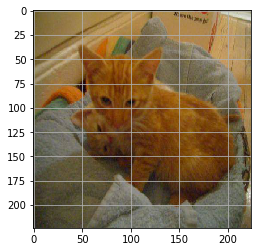

Predicted: [('n02342885', 'hamster', 0.36709088), ('n02808304', 'bath_towel', 0.0830476), ('n02123159', 'tiger_cat', 0.07314094)]


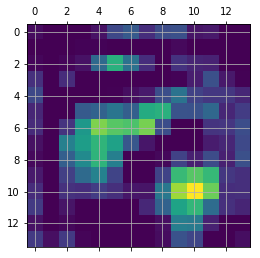

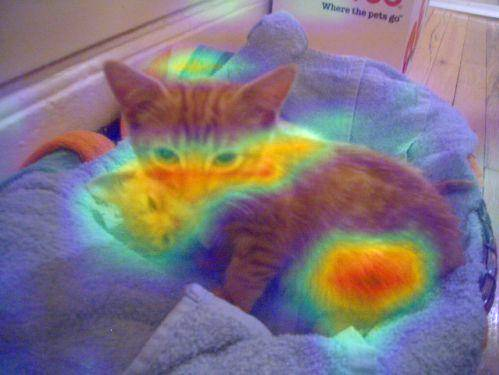

In [17]:
img = os.listdir(train_cats_dir)[0]
img_path = os.path.join(train_cats_dir, img)
img_path

process_image(img_path)

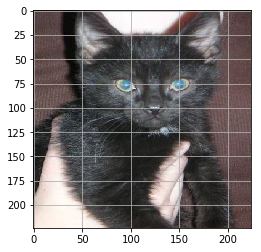

Predicted: [('n02124075', 'Egyptian_cat', 0.4232462), ('n03085013', 'computer_keyboard', 0.06765419), ('n04074963', 'remote_control', 0.06712252)]


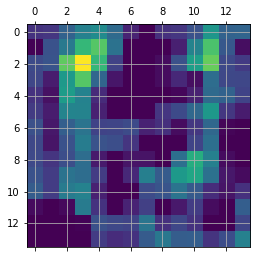

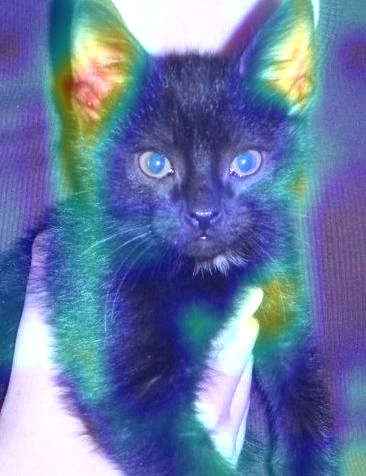

In [18]:
img = os.listdir(train_cats_dir)[100]
img_path = os.path.join(train_cats_dir, img)
img_path

process_image(img_path)

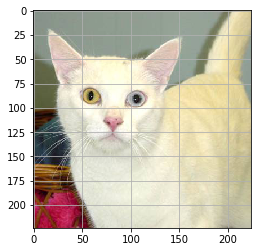

Predicted: [('n02124075', 'Egyptian_cat', 0.19412735), ('n02883205', 'bow_tie', 0.122662015), ('n02127052', 'lynx', 0.095298514)]


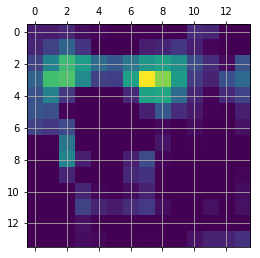

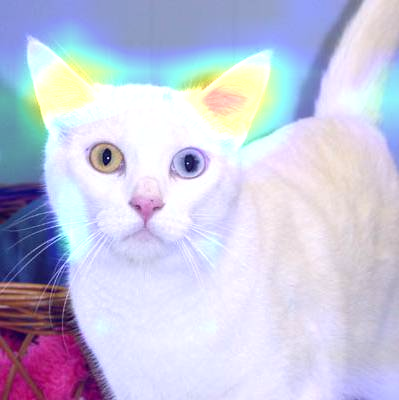

In [19]:
img = os.listdir(train_cats_dir)[200]
img_path = os.path.join(train_cats_dir, img)
img_path

process_image(img_path)

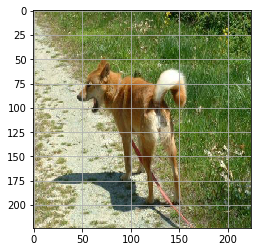

Predicted: [('n02115641', 'dingo', 0.52725583), ('n02110806', 'basenji', 0.2128663), ('n02091244', 'Ibizan_hound', 0.088716)]


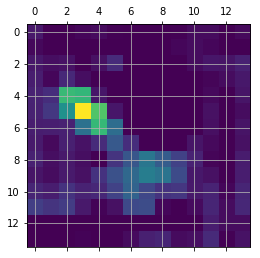

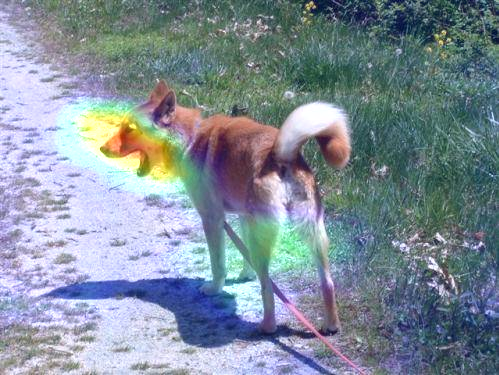

In [20]:
img = os.listdir(train_dogs_dir)[0]
img_path = os.path.join(train_dogs_dir, img)
img_path

process_image(img_path)

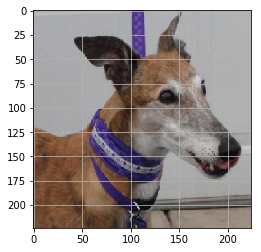

Predicted: [('n02091134', 'whippet', 0.69323885), ('n02091831', 'Saluki', 0.108181946), ('n02090622', 'borzoi', 0.06967334)]


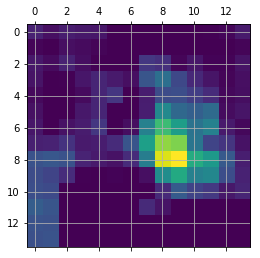

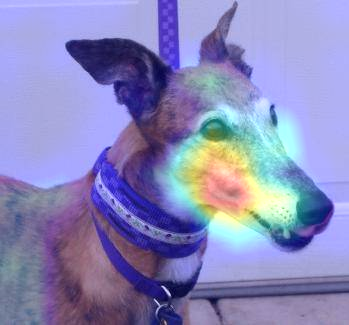

In [21]:
img = os.listdir(train_dogs_dir)[10]
img_path = os.path.join(train_dogs_dir, img)
img_path

process_image(img_path)

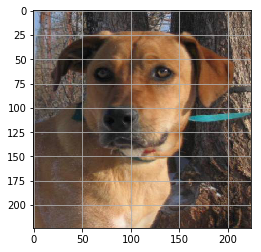

Predicted: [('n02087394', 'Rhodesian_ridgeback', 0.6169358), ('n02090379', 'redbone', 0.16116294), ('n02089973', 'English_foxhound', 0.0312866)]


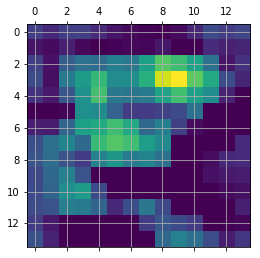

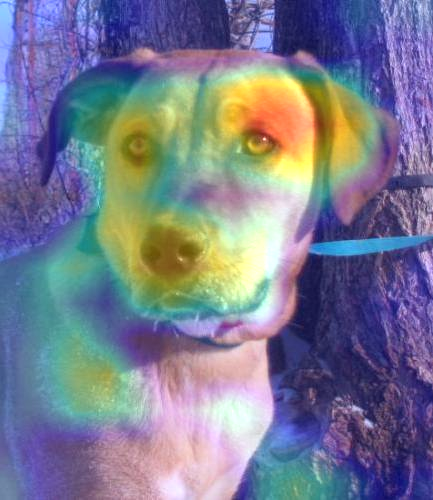

In [22]:
img = os.listdir(train_dogs_dir)[80]
img_path = os.path.join(train_dogs_dir, img)
img_path

process_image(img_path)